<a href="https://colab.research.google.com/github/alexfok/IntroDeepLearning2022/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [2]:
load_from_drive = True

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/IntroDeepLearning2022Data/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Mounted at /content/gdrive


Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [3]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [4]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [5]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [6]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here
#-----------------------------------------------------------------------------------------------------------------------------------
# It would be problematic to have some songs from an artist in the training set and other songs from the same artist in the test set
# because of in this specific case, we using dataset of songs, artists have common ground that can be repeated in other songs
# from the same artist. so if different songs from same artist will show up in the training and validation sets
# it could affect our model projection, it can tilt the classification to correct answer duo to 
# same artist style song that was in our training set. 
#-----------------------------------------------------------------------------------------------------------------------------------


### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [7]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [8]:
# Write your explanation here
#-------------------------------------------------------------------------------------------------------
# it would be improper to compute and use test set means and standart deviations for a few reasons:
# 1) while we training our model the data normalization based on independent and identically distributed samples (dynamic range)
# 2) when we put our model under test, the input data should be the same type so it can be captured in the right way by our model
# 3) the test samples or its statistic values are not exposed to us
#-------------------------------------------------------------------------------------------------------

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [9]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here
# Overfitting # TODO: Alex The model can show good results on training and test
#------------------------------------------------------------------------------------------------------------------------------------------------------------
# we should limit how many times we use the test set, and that we should use the validation set during the model building process
# duo to biased evaluations and overfitting
# when we training our model, its have to be with total seperation from test set
# in case we don't emphasize it, we will affect the generalization measure of the model
# and it will lead to biased evaluations 
# this is the reason we need to use the validation set, in our case its a little group of songs from training set
# and not used while training our model, and with that we evaluate our model perfomance and if learning curve is correct while examine the overfitting status
#-------------------------------------------------------------------------------------------------------------------------------------------------------------- 

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [10]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  eps=1e-9
  return -t * np.log(y + eps) - (1 - t) * np.log(1 - y + eps)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [11]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  y = np.dot(X,w) + b
#  print(y.shape, y.ndim)
  return sigmoid(y)

pred(np.zeros(90), 1, np.ones([2, 90]))

array([0.73105858, 0.73105858])

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [12]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  # TODO: if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
  errors = y - t
  #errors = get_accuracy(y, t)
  #print('errors: {}, X.shape: {}'.format(errors, X.shape))
  grad_w = np.dot(X.T, errors)
  grad_w /= X.shape[0]
  grad_b = np.mean(errors)
  #print('grad_w.shape: {}, grad_b.shape: {}'.format(grad_w.shape, grad_b.shape))
  return grad_w, grad_b 
#xxx = np.ones([2, 90])
#derivative_cost(np.zeros(90), 1, np.ones([2, 90]))
#print(xxx.shape)


# **Explenation on Gradients**


\begin{eqnarray} \frac{\partial\mathcal{L}_{CE}}{\partial {\bf w}} &=& \left[\frac{\partial \mathcal{L}_{CE}}{\partial w_1}, \ \ldots, \ \frac{\partial \mathcal{L}_{CE}}{\partial w_d} \right] = \frac{1}{N}({\bf y-t}){\bf X}\in \mathbb{R}^{1\times d}\\ \frac{\partial\mathcal{L}}{\partial {\bf b}} &=& \left[\frac{\partial \mathcal{L}_{CE}}{\partial b_1}, \ \ldots, \ \frac{\partial \mathcal{L}_{CE}}{\partial b_N} \right] = \frac{1}{N}({\bf y-t}) \in \mathbb{R}^{1 \times N} \end{eqnarray}

\n
\begin{eqnarray} \frac{\partial\mathcal{L}}{\partial \beta} &=& \frac{\partial\mathcal{L}}{\partial {\bf b}} \cdot \frac{\partial {\bf b}}{\partial \beta} = \frac{1}{N}({\bf y-t}){\bf 1} = \frac{1}{N} \sum_{i=1}^N (y_i-t_i)\in \mathbb{R} \end{eqnarray}







**Add here an explaination on how the gradients are computed**:

Write your explanation here. Use Latex to write mathematical expressions. [Here is a brief tutorial on latex for notebooks.](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)




### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [13]:
# Your code goes here
# Random seed 
np.random.seed(100)
'''
r1 = ...
r2 = ...
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)
'''
#  Preconditions: np.shape(w) == (90,)
#                 type(b) == float
#                 np.shape(X) = (N, 90) for some N
#pred(np.zeros(90), 1, np.ones([2, 90]))

w = 0.01*np.random.randn(90)
#w = np.ones(90)
#w = np.zeros(90)
b = 1.0
i = 1
h = 1e-9
batch_size = 10
X = train_norm_xs[i:(i + batch_size)]
t = train_ts[i:(i + batch_size), 0]

#t = np.array([0,1,1])
#X = np.ones([3, 9])
            
#print(X.shape)
y = pred(w, b, X)
y_h = pred(w, b+h, X)
#print(t)
#print(y+h)
#tt = np.log(1 - y)
#print(tt)
#tt = np.log(y)
#print(y-h)

#l = cost(y, t)
#l_h = cost(y + h, t)
#print(y+h)
#l = cross_entropy(t, y + h)
#l_h = cross_entropy(t, y + h)
#r2 = (l_h - l)/h

_, r2 = derivative_cost(X, y, t)

#r2 = np.mean((y_h - y)/h)
r1 = (cost(y_h,t) - cost(y,t))/h
#r2 = (y_h - y)/h

print("The analytical results is -", r1)
print("The algorithm results is - ", r2)


The analytical results is - 0.12001610816270157
The algorithm results is -  0.12001623783462997


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [14]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code

'''
r1 = ...
r2 = ...
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)
'''
#w = 0.01*np.random.randn(90)
#w = np.ones(90)
w = np.zeros(90)
b = 1.0
i = 1
h = 1e-9
batch_size = 1
X = train_norm_xs[i:(i + batch_size)]
t = train_ts[i:(i + batch_size), 0]

r1 = np.zeros(X.shape[1])
y = pred(w, b, X)
for j in range(X.shape[1]):
  eps = np.zeros(X.shape[1])
  eps[j] = h
  y_h = pred(w + eps, b, X)
  r1[j] = (cost(y_h,t) - cost(y,t))/h  


r2, _ = derivative_cost(X, y, t)

print("The analytical results is -", r1)
print("The algorithm results is - ", r2)


The analytical results is - [-3.27497252e-01 -3.71578546e-01 -5.21477306e-02 -4.57657245e-01
  1.31356037e-02 -2.41806464e-01 -2.00755634e-01 -2.33907949e-01
  1.60065849e-02 -2.41607845e-02 -3.38188366e-02  1.35614187e-01
  1.54047775e-01  2.10352347e-01 -8.81583140e-02 -1.15287779e-01
  7.51258500e-02 -3.50410201e-01 -4.32012204e-02  6.25435259e-02
  2.04990469e-01  5.73503467e-02 -6.40751008e-01  5.11118925e-02
  1.72073245e-01 -7.09404757e-03  3.04538672e-01 -1.17790999e-01
 -6.95261015e-01 -7.69788677e-02  1.68085990e-01  5.33417199e-02
  3.74756337e-02 -6.93813118e-01  2.75029277e-01  5.39095435e-02
 -6.23067709e-02 -5.24780219e-02  1.10059128e-01  1.57589386e-01
 -5.22661914e-02  1.36316458e-01 -5.45778978e-02  7.41631756e-02
  2.33983943e-01  2.95990787e-01 -6.08463280e-03 -3.06474124e-01
  2.13309315e-01  8.23098811e-02  5.04358222e-02 -1.99300798e-01
 -7.08760273e-02  7.96628319e-02  8.58885740e-02 -1.77006854e-01
 -1.71714309e-01  2.16789364e-02  2.15846230e-02 -2.49361753e-

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [15]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0
  global train_xs, train_norm_xs, train_ts
  train_costs = [] #np.array(max_iters)
  train_accs = []
  val_costs = []
  val_accs = []
#  from tqdm import tqdm

#  for iter in tqdm(range(max_iters)):
  for iter in range(max_iters):
#  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    # shuffle the training set
    reindex = np.random.permutation(len(train_xs))
    train_xs = train_xs[reindex]
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]
    

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y = pred(w, b, X)
      # print('X.shape', X.shape, 't.shape', t.shape)
      # print('y.shape', y.shape, 'w.shape', w.shape, 'b.shape', b.shape)
      # update w and b
      dw, db = derivative_cost(X, y, t)
      w -= mu*dw
      b -= mu*db

      # increment the iteration count
      #iter += 1
    # compute and print the *training* loss and accuracy
    #if (iter % 10 == 0):
      # TODO: change me. Predict the whole train ds for now
    X_train = train_norm_xs[0:batch_size]
    t_train = train_ts[0:batch_size,0]
#      print('X_train.shape',X_train.shape, 't_train.shape', t_train.shape)
    y_train = pred(w, b, X_train)
    train_cost = cost(y_train, t_train)
    train_acc = get_accuracy(y_train, t_train)
    train_costs.append(train_cost)
#    train_costs[iter] = train_cost
    train_accs.append(train_acc)
#    print("Iter %d. [Train Acc %.0f%%, Loss %f]" % (
#            iter, train_acc * 100, train_cost))
    
    # compute and print the *validation* loss and accuracy
    #if (iter % 2 == 0):
    #val_norm_xs
    X_val = val_norm_xs
    t_val = val_ts[:, 0]
    # print('X_val.shape',X_val.shape, 't_val.shape', t_val.shape)
    y_val = pred(w, b, X_val)
    val_cost = cost(y_val, t_val)
    val_acc = get_accuracy(y_val, t_val)
    val_costs.append(val_cost)
    val_accs.append(val_acc)
    if (iter % 2 == 0):
      print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
            iter, val_acc * 100, val_cost))

      #if iter >= max_iters:
      #  break

      # Think what parameters you should return for further use
#  print('Finished run_gradient_descent')
  return w, b, train_costs, train_accs, val_costs, val_accs




### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

In [16]:
def plot(title, data_1, legend_1, xlabel = "Number of Iterations", ylabel = "Error", data_2 = None, legend_2 = None):
    plt.semilogy(data_1, label=legend_1)
    if data_2 is not None:
        plt.semilogy(data_2, label=legend_2)
    plt.legend(loc="upper right")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

Iter 0. [Val Acc 66%, Loss 0.682117]
Iter 2. [Val Acc 67%, Loss 0.666180]
Iter 4. [Val Acc 68%, Loss 0.654853]
Iter 6. [Val Acc 68%, Loss 0.646114]
Iter 8. [Val Acc 69%, Loss 0.639042]
Iter 10. [Val Acc 69%, Loss 0.633138]
Iter 12. [Val Acc 69%, Loss 0.628105]
Iter 14. [Val Acc 70%, Loss 0.623746]
Iter 16. [Val Acc 70%, Loss 0.619922]
Iter 18. [Val Acc 70%, Loss 0.616531]
Iter 20. [Val Acc 70%, Loss 0.613500]
Iter 22. [Val Acc 70%, Loss 0.610769]
Iter 24. [Val Acc 71%, Loss 0.608291]
Iter 26. [Val Acc 71%, Loss 0.606030]
Iter 28. [Val Acc 71%, Loss 0.603956]
Iter 30. [Val Acc 71%, Loss 0.602045]
Iter 32. [Val Acc 71%, Loss 0.600276]
Iter 34. [Val Acc 71%, Loss 0.598634]
Iter 36. [Val Acc 71%, Loss 0.597101]
Iter 38. [Val Acc 71%, Loss 0.595670]
Iter 40. [Val Acc 72%, Loss 0.594328]
Iter 42. [Val Acc 72%, Loss 0.593067]
Iter 44. [Val Acc 72%, Loss 0.591879]
Iter 46. [Val Acc 72%, Loss 0.590757]
Iter 48. [Val Acc 72%, Loss 0.589697]


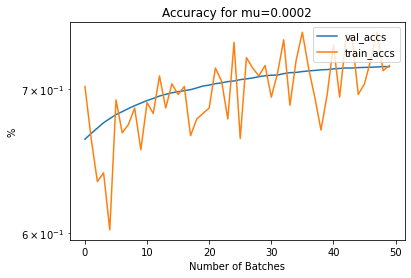

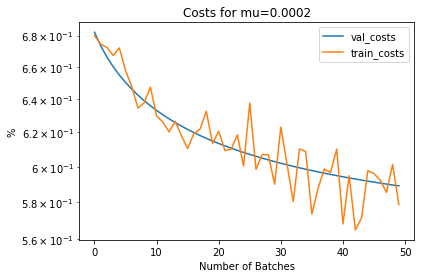

Iter 0. [Val Acc 73%, Loss 0.568192]
Iter 2. [Val Acc 73%, Loss 0.562544]
Iter 4. [Val Acc 73%, Loss 0.561812]
Iter 6. [Val Acc 73%, Loss 0.561870]
Iter 8. [Val Acc 73%, Loss 0.561716]
Iter 10. [Val Acc 73%, Loss 0.561599]
Iter 12. [Val Acc 73%, Loss 0.561871]
Iter 14. [Val Acc 73%, Loss 0.561865]
Iter 16. [Val Acc 73%, Loss 0.561997]
Iter 18. [Val Acc 73%, Loss 0.561798]
Iter 20. [Val Acc 73%, Loss 0.561839]
Iter 22. [Val Acc 73%, Loss 0.561822]
Iter 24. [Val Acc 73%, Loss 0.561892]
Iter 26. [Val Acc 73%, Loss 0.561766]
Iter 28. [Val Acc 73%, Loss 0.561806]
Iter 30. [Val Acc 73%, Loss 0.561871]
Iter 32. [Val Acc 73%, Loss 0.561801]
Iter 34. [Val Acc 73%, Loss 0.561744]
Iter 36. [Val Acc 73%, Loss 0.561903]
Iter 38. [Val Acc 73%, Loss 0.561784]
Iter 40. [Val Acc 73%, Loss 0.562032]
Iter 42. [Val Acc 73%, Loss 0.561875]
Iter 44. [Val Acc 73%, Loss 0.561891]
Iter 46. [Val Acc 73%, Loss 0.561779]
Iter 48. [Val Acc 73%, Loss 0.561747]


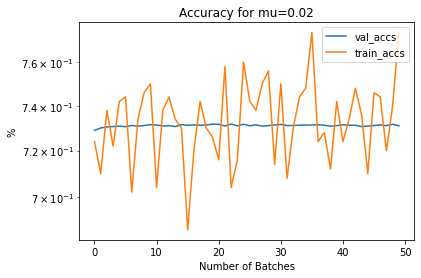

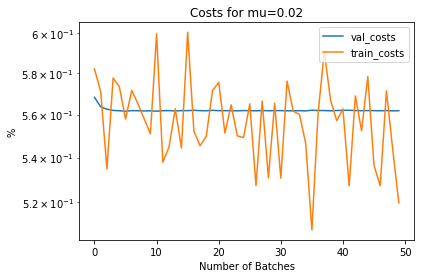

Iter 0. [Val Acc 69%, Loss 0.714065]
Iter 2. [Val Acc 63%, Loss 0.961921]
Iter 4. [Val Acc 69%, Loss 0.725707]
Iter 6. [Val Acc 66%, Loss 0.854057]
Iter 8. [Val Acc 63%, Loss 0.927682]
Iter 10. [Val Acc 65%, Loss 0.819612]
Iter 12. [Val Acc 71%, Loss 0.680543]
Iter 14. [Val Acc 68%, Loss 0.755314]
Iter 16. [Val Acc 67%, Loss 0.813591]
Iter 18. [Val Acc 63%, Loss 1.120401]
Iter 20. [Val Acc 65%, Loss 0.786622]
Iter 22. [Val Acc 64%, Loss 0.891984]
Iter 24. [Val Acc 65%, Loss 0.787508]
Iter 26. [Val Acc 65%, Loss 0.807455]
Iter 28. [Val Acc 68%, Loss 0.745009]
Iter 30. [Val Acc 64%, Loss 0.848122]
Iter 32. [Val Acc 70%, Loss 0.731021]
Iter 34. [Val Acc 67%, Loss 0.824116]
Iter 36. [Val Acc 65%, Loss 0.793853]
Iter 38. [Val Acc 68%, Loss 0.727533]
Iter 40. [Val Acc 67%, Loss 0.791316]
Iter 42. [Val Acc 67%, Loss 0.801897]
Iter 44. [Val Acc 65%, Loss 0.894893]
Iter 46. [Val Acc 68%, Loss 0.739664]
Iter 48. [Val Acc 62%, Loss 0.960339]


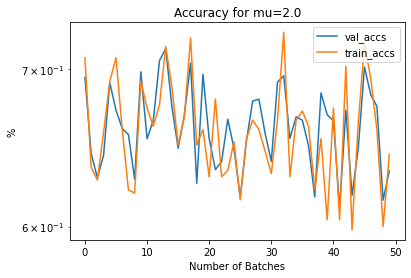

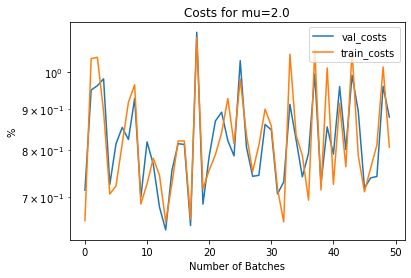

In [17]:
#w0 = np.random.randn(90)
#b0 = np.random.randn(1)[0]
w0 = np.zeros(90)
b0 = np.zeros(1)[0]
mus=[2e-4, 2e-2, 2.0]
# Write your code here
# Small mu
#w, b, train_costs, train_accs, val_costs, val_accs = run_gradient_descent(w0, b0, mu=0.0002, batch_size=500, max_iters=50)
# Large mu
#w, b, train_costs, train_accs, val_costs, val_accs = run_gradient_descent(w0, b0, mu=2.0, batch_size=500, max_iters=50)
# Interesting mu
#w, b, train_costs, train_accs, val_costs, val_accs = run_gradient_descent(w0, b0, mu=0.05, batch_size=500, max_iters=50)
# Good mu
for mu in mus:
  w, b, train_costs, train_accs, val_costs, val_accs = run_gradient_descent(w0, b0, mu, batch_size=500, max_iters=50)
  # Plot the results
  plot(f"Accuracy for mu={mu}", val_accs, "val_accs", xlabel = "Number of Batches", ylabel = "%", data_2 = train_accs, legend_2 = "train_accs")
  plot(f"Costs for mu={mu}", val_costs, "val_costs", xlabel = "Number of Batches", ylabel = "%", data_2 = train_costs, legend_2 = "train_costs")


**Explain and discuss your results here:**


In [18]:
# TODO: Gal's code to test
'''
w0 = np.zeros(90)
b0 = 0
# Write your code here
lrs = [1e-3, 1e-1, 1.5] # learning rates batch_size=500
max_iters=20
batch_size=500
fig, axs = plt.subplots(2)
fig.suptitle(f'learning curve for $\mu\in{str(lrs)}$')
iters = range(0,max_iters,10)
for mu in lrs:
  print(f"mu = {mu}")
  #w, b, train_costs, train_accs, val_costs, val_accs
  w, b, train_costs, train_accs, val_loss, acc_loss = run_gradient_descent(w0, b0, mu=mu, batch_size=batch_size,
#  _, _, val_loss, acc_loss = run_gradient_descent(w0, b0, mu=mu, batch_size=batch_size,
  max_iters=max_iters)
  axs[0].plot(iters, val_loss, label=f"$\mu$={mu}")
  axs[1].plot(iters, acc_loss, label=f"$\mu$={mu}")
  axs[0].set(xlabel='Number of iteration', ylabel='Validation Loss')
  axs[1].set(xlabel='Number of iteration', ylabel='Validation Accuracy')
  axs[0].grid()
  axs[1].grid()
  axs[0].legend()
  axs[1].legend()
  plt.show()
'''

'\nw0 = np.zeros(90)\nb0 = 0\n# Write your code here\nlrs = [1e-3, 1e-1, 1.5] # learning rates batch_size=500\nmax_iters=20\nbatch_size=500\nfig, axs = plt.subplots(2)\nfig.suptitle(f\'learning curve for $\\mu\\in{str(lrs)}$\')\niters = range(0,max_iters,10)\nfor mu in lrs:\n  print(f"mu = {mu}")\n  #w, b, train_costs, train_accs, val_costs, val_accs\n  w, b, train_costs, train_accs, val_loss, acc_loss = run_gradient_descent(w0, b0, mu=mu, batch_size=batch_size,\n#  _, _, val_loss, acc_loss = run_gradient_descent(w0, b0, mu=mu, batch_size=batch_size,\n  max_iters=max_iters)\n  axs[0].plot(iters, val_loss, label=f"$\\mu$={mu}")\n  axs[1].plot(iters, acc_loss, label=f"$\\mu$={mu}")\n  axs[0].set(xlabel=\'Number of iteration\', ylabel=\'Validation Loss\')\n  axs[1].set(xlabel=\'Number of iteration\', ylabel=\'Validation Accuracy\')\n  axs[0].grid()\n  axs[1].grid()\n  axs[0].legend()\n  axs[1].legend()\n  plt.show()\n'

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

Iter 0. [Val Acc 57%, Loss 1.975615]
Iter 2. [Val Acc 64%, Loss 0.994771]
Iter 4. [Val Acc 69%, Loss 0.690185]
Iter 6. [Val Acc 71%, Loss 0.606183]
Iter 8. [Val Acc 72%, Loss 0.581177]
Iter 10. [Val Acc 73%, Loss 0.571562]
Iter 12. [Val Acc 73%, Loss 0.567245]
Iter 14. [Val Acc 73%, Loss 0.564974]
Iter 16. [Val Acc 73%, Loss 0.563742]
Iter 18. [Val Acc 73%, Loss 0.563043]
Iter 20. [Val Acc 73%, Loss 0.562678]
Iter 22. [Val Acc 73%, Loss 0.562453]
Iter 24. [Val Acc 73%, Loss 0.562227]
Iter 26. [Val Acc 73%, Loss 0.562066]
Iter 28. [Val Acc 73%, Loss 0.562043]
Iter 30. [Val Acc 73%, Loss 0.561882]
Iter 32. [Val Acc 73%, Loss 0.561868]
Iter 34. [Val Acc 73%, Loss 0.561868]
Iter 36. [Val Acc 73%, Loss 0.561803]
Iter 38. [Val Acc 73%, Loss 0.561808]
Iter 40. [Val Acc 73%, Loss 0.561852]
Iter 42. [Val Acc 73%, Loss 0.561776]
Iter 44. [Val Acc 73%, Loss 0.561806]
Iter 46. [Val Acc 73%, Loss 0.561849]
Iter 48. [Val Acc 73%, Loss 0.561838]
minimal_cost: 0, cost_diff: 1.413779789481637, batch_si

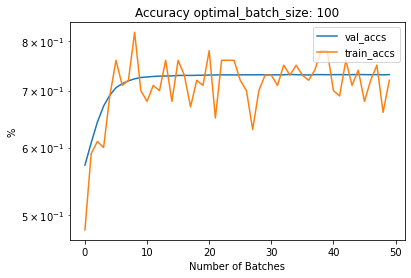

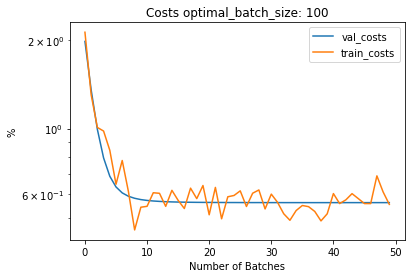

In [19]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]
#w0 = np.zeros(90)
#b0 = np.zeros(1)[0]
#mus=[2e-3, 2e-2, 2.0]
mu=2e-2
mu=2e-3
minimal_cost = 1000
minimal_cost_diff = 0

batch_size=500
max_iters=50

optimal_w = w0
optimal_b = b0
optimal_batch_size = 0
optimal_train_costs = []
optimal_train_accs = []
optimal_val_costs = []
optimal_val_accs = []

# Write your code here
for batch_size in range(100, 1000, 300):
  w, b, train_costs, train_accs, val_costs, val_accs = run_gradient_descent(w0, b0, mu, batch_size, max_iters)
  cost_diff = val_costs[0] - val_costs[len(val_costs)-1]
  if (cost_diff > minimal_cost_diff):
    print(f"minimal_cost: {minimal_cost_diff}, cost_diff: {cost_diff}, batch_size: {batch_size}")
    minimal_cost_diff = cost_diff
#  if (np.mean(val_costs) < minimal_cost):
#    print(f"minimal_cost: {minimal_cost}, np.mean(val_costs): {np.mean(val_costs)}, batch_size: {batch_size}")
#    minimal_cost = np.mean(val_costs)
    optimal_w = w0
    optimal_b = b0
    optimal_batch_size = batch_size
    optimal_train_costs = train_costs
    optimal_train_accs = train_accs
    optimal_val_costs = val_costs
    optimal_val_accs = val_accs

#print(f"optimal_batch_size: {optimal_batch_size}, optimal_w: {optimal_w}, optimal_b: {optimal_b}")
print(f"optimal_batch_size: {optimal_batch_size}")
# Plot the results
plot(f"Accuracy optimal_batch_size: {optimal_batch_size}", optimal_val_accs, "val_accs", xlabel = "Number of Batches", ylabel = "%", data_2 = optimal_train_accs, legend_2 = "train_accs")
plot(f"Costs optimal_batch_size: {optimal_batch_size}", optimal_val_costs, "val_costs", xlabel = "Number of Batches", ylabel = "%", data_2 = optimal_train_costs, legend_2 = "train_costs")


**Explain and discuss your results here:**




### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [28]:
def calc_acc(w, b, data_norm_xs, data_ts):
  """Return the values of train_acc, test_acc, val_acc.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - (w, b)

  Precondition: np.shape(w) == (90,)
                type(b) == float
 
  Postcondition: 
                 type(train_acc) == float, type(test_acc) == float, type(val_acc) == float
  """
  # compute the dataset loss and accuracy
  X = data_norm_xs
  t = data_ts[:, 0]
  y = pred(w, b, X)
  data_acc = get_accuracy(y, t)
  return data_acc




In [29]:
# Write your code here

train_acc = calc_acc(w, b, train_norm_xs, train_ts)
val_acc = calc_acc(w, b, val_norm_xs, val_ts)
test_acc = calc_acc(w, b, test_norm_xs, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.7329659306527441  val_acc =  0.7314  test_acc =  0.7268448576409064


**Explain and discuss your results here:**
TODO: Explanation

### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [34]:
import sklearn.linear_model

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(train_norm_xs, train_ts[:, 0])
train_acc = model.score(train_norm_xs, train_ts[:, 0])
val_acc = model.score(val_norm_xs, val_ts[:, 0])
test_acc = model.score(test_norm_xs, test_ts[:, 0])

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

train_acc =  0.7330142731107163  val_acc =  0.7314  test_acc =  0.7269417005616889


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
